In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [2]:
olivetti=fetch_olivetti_faces()

In [3]:
X=olivetti.data
y=olivetti.target


In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,shuffle=True,stratify=y)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=.15,shuffle=True,stratify=y_train)

In [5]:
from sklearn.decomposition import PCA

pca=PCA(n_components=.99)
X_train=pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)
X_test= pca.transform(X_test)

In [6]:
pca.n_components_

205

In [7]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)


(289, 205) (289,)
(51, 205) (51,)
(60, 205) (60,)


In [8]:
# import some libraries
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
num_classes = 40

In [10]:
y.shape

(400,)

In [11]:
from keras.optimizers import Adam

adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
loss = ['sparse_categorical_crossentropy']

metrics = ['accuracy']


In [12]:
from tensorflow import keras 
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import Dropout,Conv2D,Activation,MaxPooling2D,BatchNormalization


model = Sequential()
#model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(50,activation='leaky_relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(.0001)))
model.add(Dropout(.2))

model.add(Dense(50,activation='leaky_relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(.0001)))

model.add(Dropout(.5))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.compile(optimizer=adam,#tf.keras.optimizers.SGD(learning_rate=0.02),
              loss=loss,
              metrics=[metrics],
              )

In [14]:
batch_size = 32
epochs = 1000
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
# early stopping https://keras.io/callbacks/
es_callback = EarlyStopping(monitor='val_loss', patience=20,verbose=1,restore_best_weights=True)

# Create checkpoint callback that will save the best model observed during training for later use
checkpoint_path = "output/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = ModelCheckpoint(checkpoint_path,monitor='val_accuracy',save_best_only=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
history = model.fit(X_train, y_train, batch_size=batch_size, validation_data =(X_valid, y_valid),epochs=epochs,
                    callbacks=[es_callback,cp_callback,lr_scheduler])

model=keras.models.load_model('output\\cp.ckpt')


Epoch 1/1000
10/10 [==============================] - 4s 382ms/step - loss: 5.2455 - accuracy: 0.0138 - val_loss: 3.6721 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/1000
10/10 [==============================] - 3s 309ms/step - loss: 4.8052 - accuracy: 0.0277 - val_loss: 3.5878 - val_accuracy: 0.0196 - lr: 0.0010
Epoch 3/1000
10/10 [==============================] - 3s 297ms/step - loss: 4.5149 - accuracy: 0.0208 - val_loss: 3.5297 - val_accuracy: 0.0392 - lr: 0.0010
Epoch 4/1000
10/10 [==============================] - 3s 305ms/step - loss: 4.1594 - accuracy: 0.0381 - val_loss: 3.4819 - val_accuracy: 0.0784 - lr: 0.0010
Epoch 5/1000
10/10 [==============================] - 4s 398ms/step - loss: 3.9706 - accuracy: 0.0623 - val_loss: 3.4361 - val_accuracy: 0.1373 - lr: 0.0010
Epoch 6/1000
10/10 [==============================] - 3s 286ms/step - loss: 3.8127 - accuracy: 0.0623 - val_loss: 3.3901 - val_accuracy: 0.1765 - lr: 0.0010
Epoch 7/1000
10/10 [==============================] - 

In [15]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

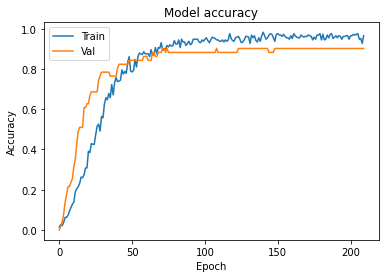

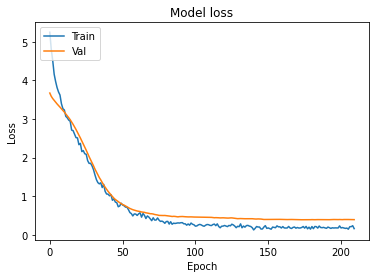

In [16]:
plot_history(history)

In [17]:
_, train_acc = model.evaluate(X_train, y_train, verbose=1)
_, val_acc = model.evaluate(X_valid, y_valid, verbose=1)

_, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Train: %.3f, val: %.3f,Test: %.3f' % (train_acc,val_acc, test_acc))

2/2 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.8833
Train: 1.000, val: 0.902,Test: 0.883
